<a href="https://colab.research.google.com/github/Saulrega/fundamentos_ML/blob/main/Arboles_de_decision_comprendiendo_nuestro_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

sns.set()

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Fundamentos Pract ML'
!ls

/content/drive/MyDrive/Colab Notebooks/Fundamentos Pract ML
 diabetes.csv
'Introducción a numpy.ipynb'
'Introducción a pandas.ipynb'
'Regresion lineal simple com scikit learn division de los datos.ipynb'
 salarios.csv
 titanic-test.csv
 titanic-train.csv


In [ ]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


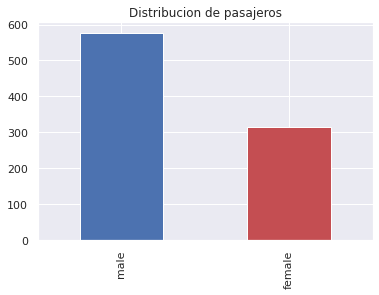

In [ ]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de pasajeros')
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')


In [ ]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
categorical_cols = [cname for cname in train_predictors.columns 
                    if (train_predictors[cname].nunique() < 10 
                        and train_predictors[cname].dtype == 'object')
                    ]

In [ ]:
numerical_cols = [cname for cname in train_predictors.columns 
                    if (train_predictors[cname].dtype in ['int64', 'float64'])
                    ]

In [ ]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]

In [ ]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size=.25, random_state=1)

In [ ]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print('Accuracy:', tree_one_accuracy)

Accuracy: 0.7489


In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

In [ ]:
out = StringIO()
tree.export_graphviz(tree_one, out_file=out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True